In [67]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from curvefit.core.model import CurveModel
from curvefit.core.functions import ln_gaussian_cdf

np.random.seed(1234)

app_dir = '/Users/nikhilvs/repos/nyu/covid-19'

In [81]:
df = pd.read_csv(os.path.join(app_dir, 'data/staging/unified.csv'))
# us_df = df[df['country_region'] == 'Spain']
df['group'] = 'all'
df['intercept'] = 1.0

df = df[df['country_region'] == 'Spain']
df['cases'] -= df['cases'].min()
df['cases'] /= df['cases'].max()
# df['cases'] = sc.special.logit(df['cases'])
df['time'] = np.arange(df.shape[0])

In [82]:
# df = pd.DataFrame()
# df['time'] = np.arange(100)

# df['death_rate'] = np.exp(.1 * (df.time - 20)) / (1 + np.exp(.1 * (df.time - 20))) + \
#                    np.random.normal(0, 0.1, size=100).cumsum()
# df['ln_death_rate'] = np.log(df['death_rate'])

# df['group'] = 'all'
# df['intercept'] = 1.0

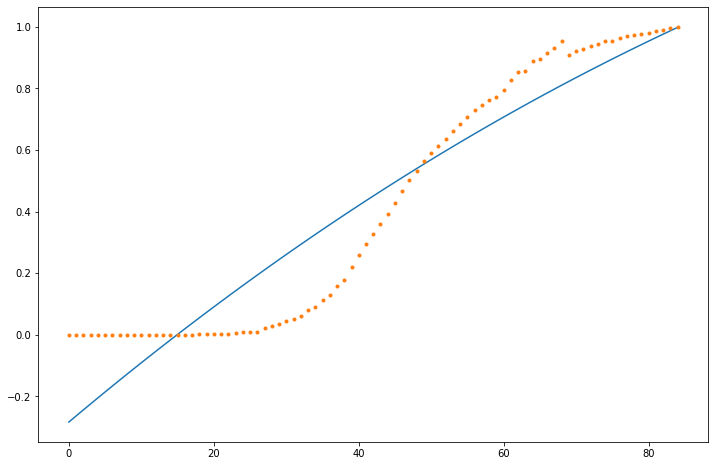

In [84]:
model = CurveModel(
    df=df,
    col_t='time',
    col_obs='cases',
    col_group='country_region',
    col_covs=[['intercept'], ['intercept'], ['intercept']],
    param_names=['alpha', 'beta', 'p'],
    link_fun=[lambda x: x, lambda x: x, lambda x: x],
    var_link_fun=[lambda x: x, lambda x: x, lambda x: x],
    fun=ln_gaussian_cdf
)

model.fit_params(
    fe_init=[0, 0, 1.],
    fe_gprior=[[0, np.inf], [0, np.inf], [1., np.inf]],
    fe_bounds=[[0., 100.], [0., 100.], [0., 100.]],
    re_bounds=[[0, 1.], [0, 1.], [0, 1.]]
)
# model.fit_params(fe_init=[0, 0, 1.])


y_pred = model.predict(
    t=df.time,
    group_name=df.group.unique()
)

plt.figure(figsize=(12, 8))
plt.plot(df.time, y_pred, '-')
plt.plot(df.time, df.cases, '.')

In [60]:
df

,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,C1_School closing,C2_Workplace closing,...,cases_lag_15,cases_lag_16,cases_lag_17,cases_lag_18,cases_lag_19,deaths,recovered,group,intercept,time
680,Spain,2020-02-15,1.55,-0.85,24.40,4.95,-0.05,-1.50,0.0,0.0,...,0,0,0,0,0,0,2,all,1.0,0
681,Spain,2020-02-16,2.20,1.50,12.65,4.70,-0.75,-1.75,0.0,0.0,...,1,0,0,0,0,0,2,all,1.0,1
682,Spain,2020-02-17,-1.20,1.35,3.15,1.40,3.90,-0.70,0.0,0.0,...,1,1,0,0,0,0,2,all,1.0,2
683,Spain,2020-02-18,-1.90,-0.15,5.95,0.35,3.80,-0.45,0.0,0.0,...,1,1,1,0,0,0,2,all,1.0,3
684,Spain,2020-02-19,-0.90,-0.30,12.85,0.75,3.70,-0.65,0.0,0.0,...,1,1,1,1,0,0,2,all,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,Spain,2020-05-05,-75.20,-32.50,-20.85,-56.05,-55.00,19.25,3.0,3.0,...,200210,198674,191726,190839,184948,25613,123486,all,1.0,80
761,Spain,2020-05-06,-75.40,-33.10,-18.70,-59.05,-54.65,19.80,3.0,3.0,...,204178,200210,198674,191726,190839,25857,126002,all,1.0,81
762,Spain,2020-05-07,-75.95,-33.75,-24.45,-61.25,-54.90,20.25,3.0,3.0,...,208389,204178,200210,198674,191726,26070,128511,all,1.0,82
763,Spain,2020-05-08,-78.60,-34.45,-37.65,-60.90,-54.05,23.20,3.0,3.0,...,213024,208389,204178,200210,198674,26299,131148,all,1.0,83
